In [1]:
import pandas as pd

from settings import key
from datetime import datetime


In [2]:
coords = []

with open("server.log", "r") as f:
    while line := f.readline():
        if '/api/v1/forecast/cities?lat=' in line:
            coords.append([
                str(float(line.split("=")[1].split("&")[0])), # lat
                str(float(line.split("=")[2].split("&")[0].split(" ")[0])), # lon
                datetime.strptime(line.split(",")[0][1:], '%Y-%m-%d %H:%M:%S'), # time
            ])


In [3]:
df = pd.DataFrame(coords)


In [4]:
df

,0,1,2
0,56.99167,24.30306,2024-10-30 21:22:50
1,56.99167,24.30306,2024-10-30 21:22:53
2,56.99167,24.30306,2024-10-30 21:22:54
3,56.99167,24.30306,2024-10-30 21:22:55
4,56.99167,24.30306,2024-10-30 21:22:55
...,...,...,...
22579,56.9549560546875,24.18711280822754,2024-11-14 14:50:01
22580,56.9549560546875,24.18711280822754,2024-11-14 14:50:01
22581,56.9549560546875,24.18711280822754,2024-11-14 14:50:01
22582,56.9549560546875,24.18711280822754,2024-11-14 14:50:01


In [5]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [6]:
df["date_h"] = df[2].apply(lambda r: r.strftime("%Y-%m-%d %H"))

In [7]:
df

,0,1,2,date_h
0,56.99167,24.30306,2024-10-30 21:22:50,2024-10-30 21
1,56.99167,24.30306,2024-10-30 21:22:53,2024-10-30 21
2,56.99167,24.30306,2024-10-30 21:22:54,2024-10-30 21
3,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
4,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
...,...,...,...,...
22579,56.9549560546875,24.18711280822754,2024-11-14 14:50:01,2024-11-14 14
22580,56.9549560546875,24.18711280822754,2024-11-14 14:50:01,2024-11-14 14
22581,56.9549560546875,24.18711280822754,2024-11-14 14:50:01,2024-11-14 14
22582,56.9549560546875,24.18711280822754,2024-11-14 14:50:01,2024-11-14 14


In [8]:
df_h = pd.DataFrame(df.groupby("date_h").count()[1]/3)

<Axes: xlabel='date_h'>

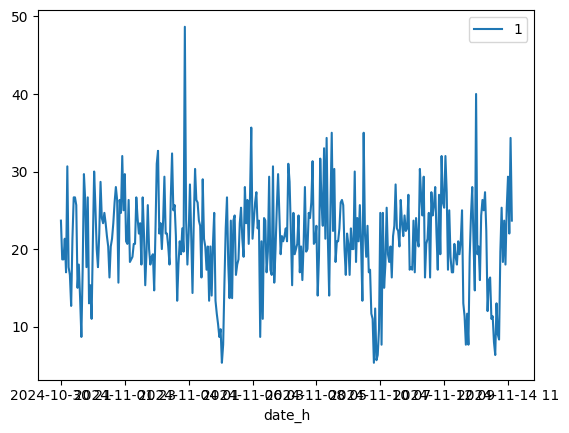

In [9]:
df_h.plot()

In [10]:
from sklearn import linear_model


In [11]:
reg = linear_model.LinearRegression()


In [12]:
import numpy as np


In [13]:
df_h_vals = df_h[1].values.reshape(-1, 1)
df_h_ct = np.array(range(len(df_h_vals))).reshape(-1, 1)


In [14]:
reg.fit(df_h_ct, df_h_vals)


LinearRegression()

In [15]:
import matplotlib.pyplot as plt


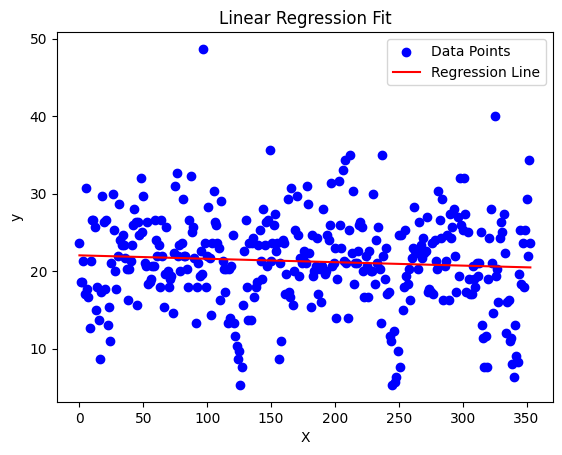

In [16]:
y_pred = reg.predict(df_h_ct)
plt.scatter(df_h_ct, df_h_vals, color='blue', label='Data Points')
plt.plot(df_h_ct, y_pred, color='red', label='Regression Line')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")

plt.show()

In [17]:
y_pred

array([[22.04316066],
       [22.03875486],
       [22.03434906],
       [22.02994325],
       [22.02553745],
       [22.02113165],
       [22.01672585],
       [22.01232005],
       [22.00791425],
       [22.00350845],
       [21.99910265],
       [21.99469684],
       [21.99029104],
       [21.98588524],
       [21.98147944],
       [21.97707364],
       [21.97266784],
       [21.96826204],
       [21.96385623],
       [21.95945043],
       [21.95504463],
       [21.95063883],
       [21.94623303],
       [21.94182723],
       [21.93742143],
       [21.93301563],
       [21.92860982],
       [21.92420402],
       [21.91979822],
       [21.91539242],
       [21.91098662],
       [21.90658082],
       [21.90217502],
       [21.89776921],
       [21.89336341],
       [21.88895761],
       [21.88455181],
       [21.88014601],
       [21.87574021],
       [21.87133441],
       [21.86692861],
       [21.8625228 ],
       [21.858117  ],
       [21.8537112 ],
       [21.8493054 ],
       [21